In [518]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import argparse
import math
import cv2

In [519]:
def DAISY(img1, img2):
    sift = cv2.xfeatures2d.SIFT_create()

    kp1_sift, _ = sift.detectAndCompute(img1, None)
    kp2_sift, _ = sift.detectAndCompute(img2, None)

    daisy = cv2.xfeatures2d.DAISY_create()

    _, daisy_des1 = daisy.compute(img1, kp1_sift)
    _, daisy_des2 = daisy.compute(img2, kp2_sift)

    return daisy_des1, daisy_des2, kp1_sift, kp2_sift


In [520]:
def brute_force_opencv_matcher(descs1, descs2, kps1, kps2, img1, img2):
    bf = cv.BFMatcher(cv2.NORM_L2, crossCheck=True)
    matches = bf.match(descs1, descs2)

    # good = []
    # for m,n in matches:
    #     if m.distance < 0.75*n.distance:
    #         good.append([m])

    matches = sorted(matches, key=lambda x: x.distance)

    return cv.drawMatches(img1, kps1, img2, kps2, matches[:10], None, flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)


In [521]:
def matcher(kps1, descs1, kps2, descs2,img1, img2):
    matches = []
    for i, k1 in enumerate(descs1):
        for j, k2 in enumerate(descs2):
            matches.append(cv.DMatch(_distance=np.linalg.norm((np.array(k1) - np.array(k2)), ord=1), _imgIdx=0, _queryIdx=i,_trainIdx=j))
            
    matches = sorted(matches, key = lambda x : x.distance)
    img3 = cv.drawMatches(img1, kps1, img2, kps2, matches[:16], None,
    flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    plt.figure(figsize=(20,20))
    plt.imshow(img3) 
    plt.show()


In [522]:
monalisa = cv.imread('images/mona.jpg', cv2.IMREAD_GRAYSCALE)
monalisa_forces = monalisa[250:350, 100:200] #cv.imread('images/mona_forc.jpg', cv2.IMREAD_GRAYSCALE)

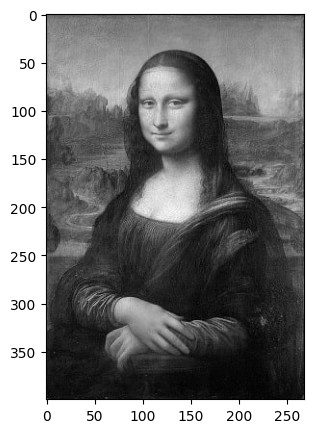

In [523]:
plt.figure(figsize=(5,5))
plt.imshow(monalisa, cmap='gray')

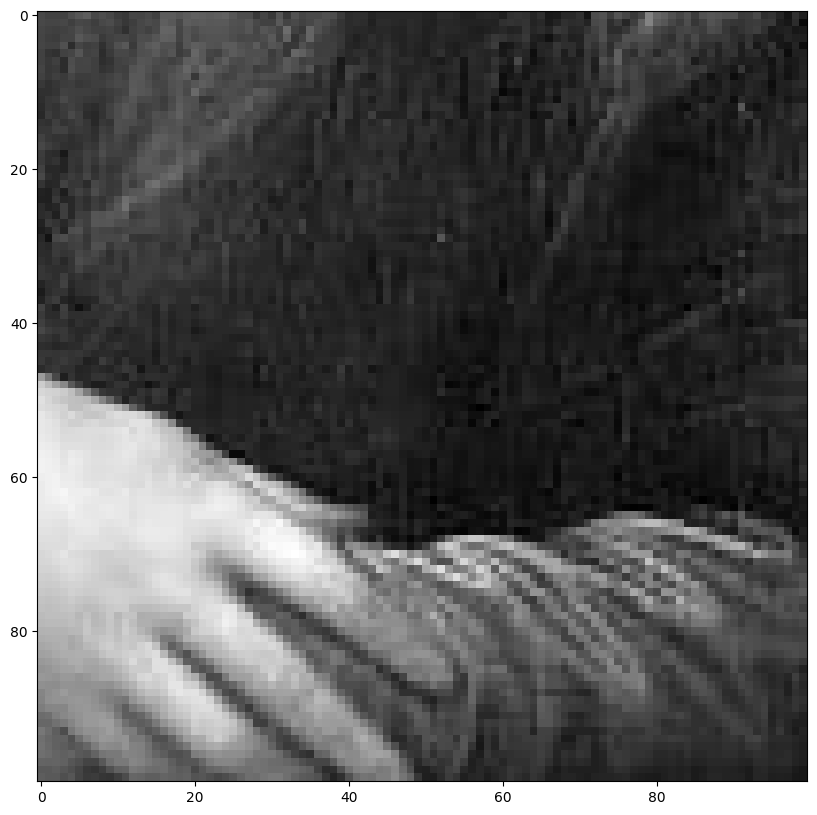

In [524]:
plt.figure(figsize=(10,10))
plt.imshow(monalisa_forces, cmap='gray')

In [525]:
descs1,descs2,kps1, kps2 = DAISY(monalisa, monalisa_forces)

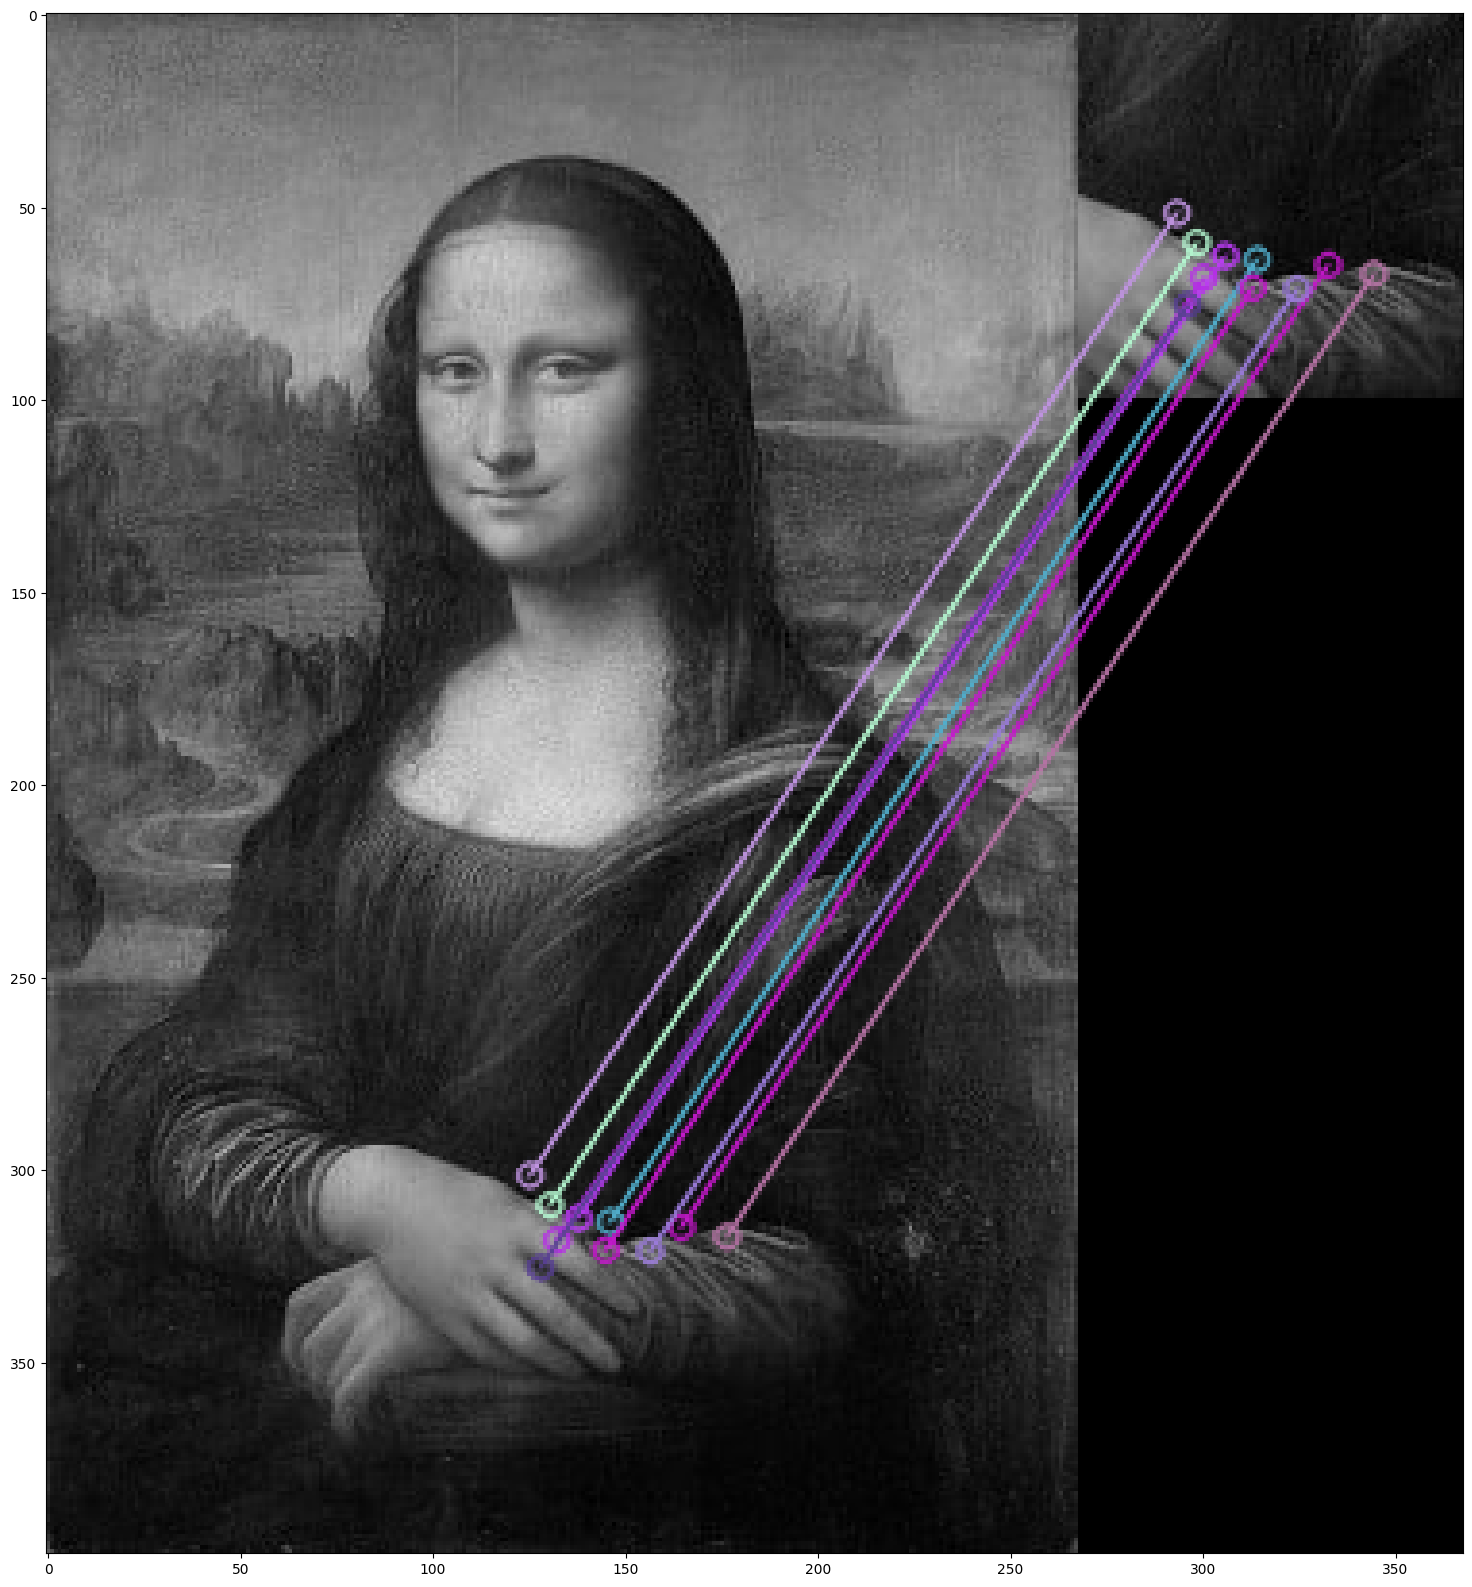

In [526]:
plt.figure(figsize=(20,20))
plt.imshow(brute_force_opencv_matcher(descs1, descs2, kps1, kps2, monalisa, monalisa_forces))
plt.show()

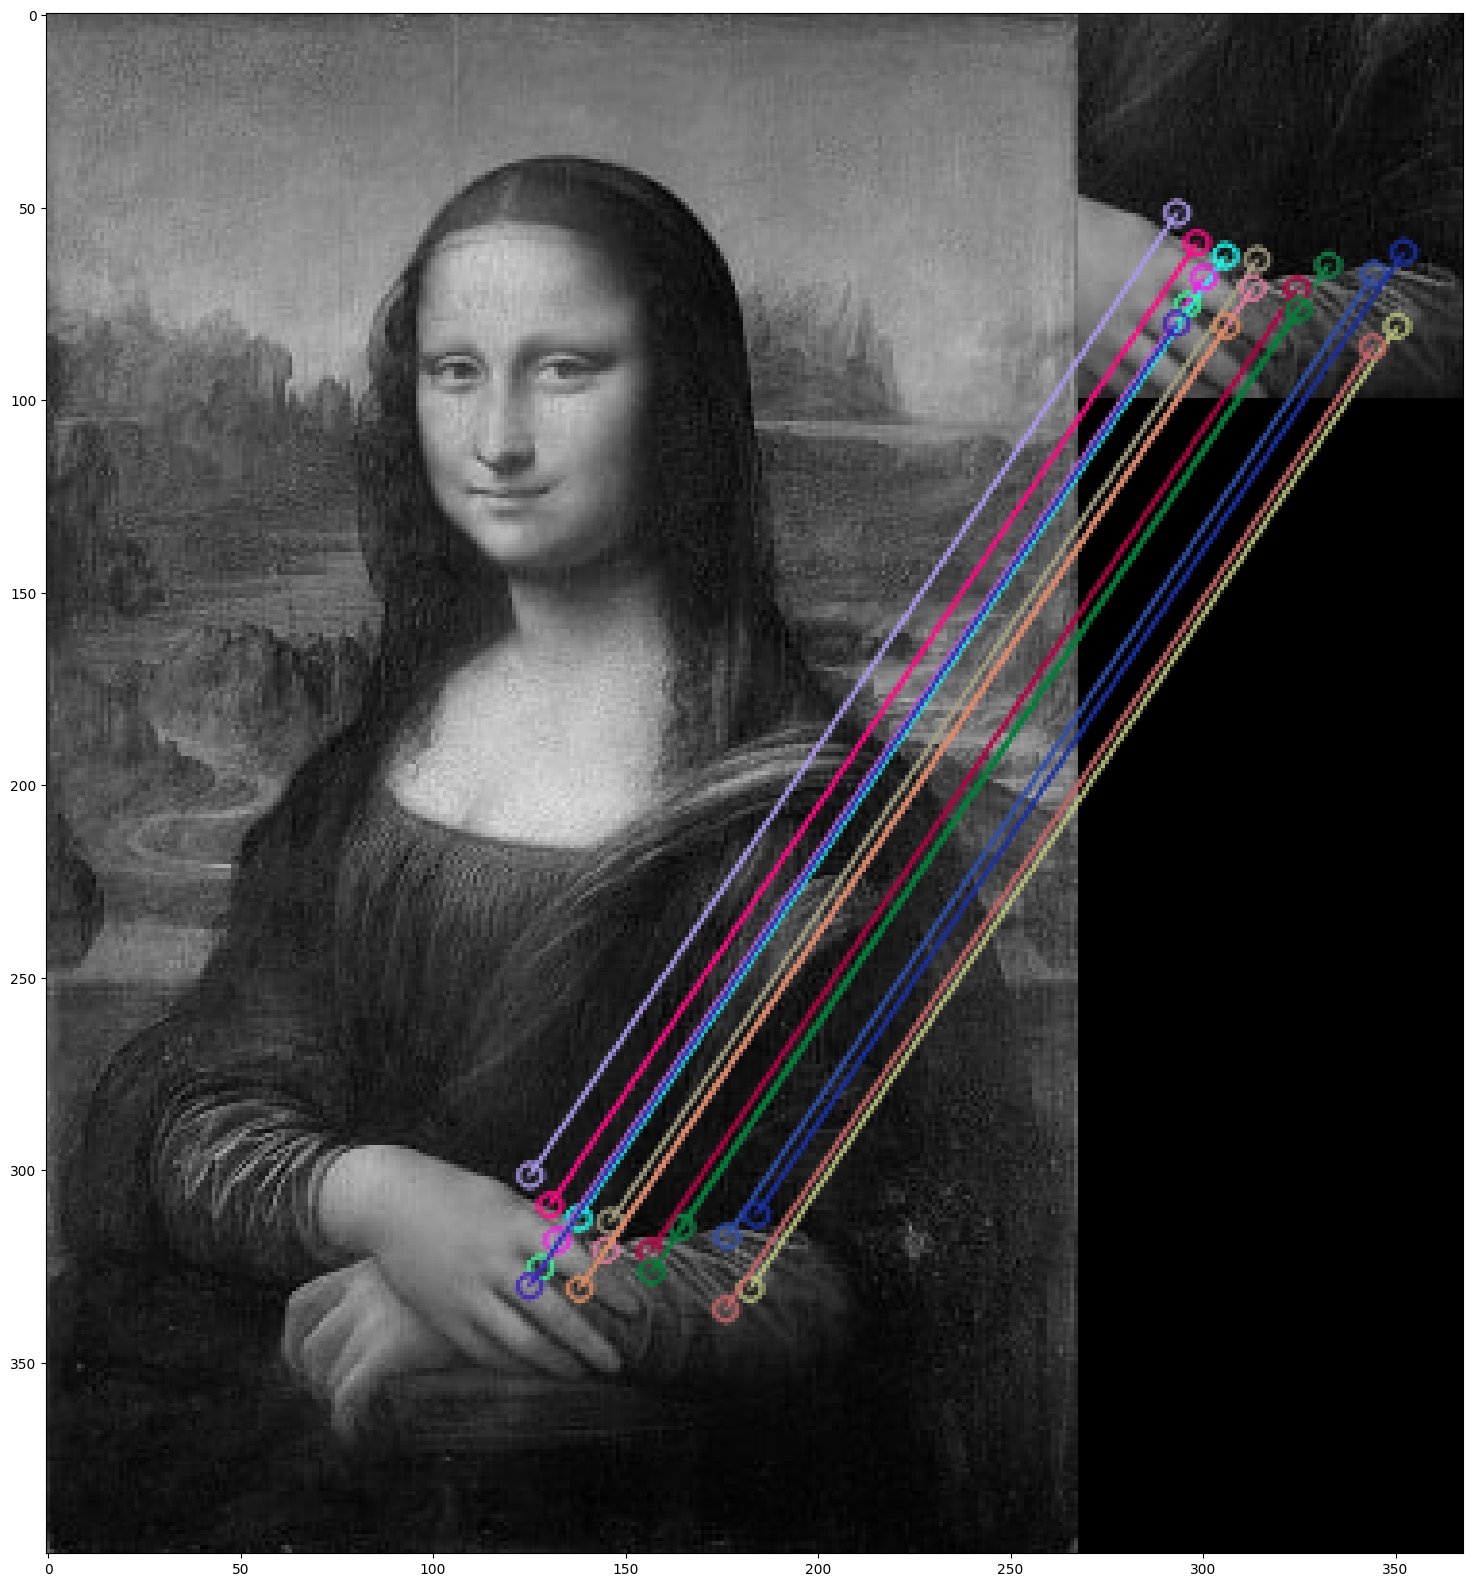

In [527]:
matcher(kps1, descs1, kps2, descs2, monalisa, monalisa_forces)

In [528]:
plane = cv.imread('images/image_0330.jpg',  cv2.IMREAD_GRAYSCALE)
plane2 = cv.imread('images/image_0331.jpg', cv2.IMREAD_GRAYSCALE)

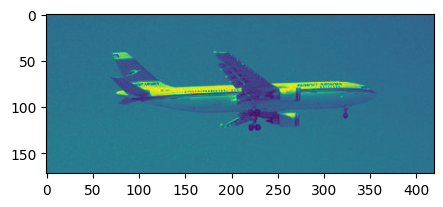

In [529]:
plt.figure(figsize=(5,5))
plt.imshow(plane)

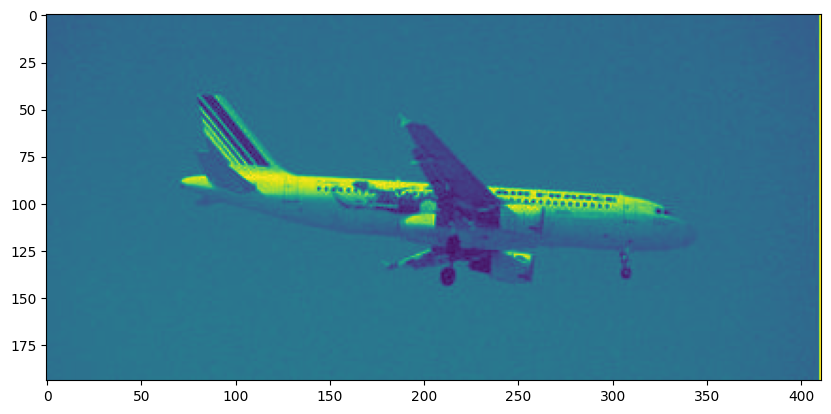

In [530]:
plt.figure(figsize=(10,10))
plt.imshow(plane2)

In [531]:
descs1_2, descs2_2, kps1_2, kps2_2 = DAISY(plane, plane2)

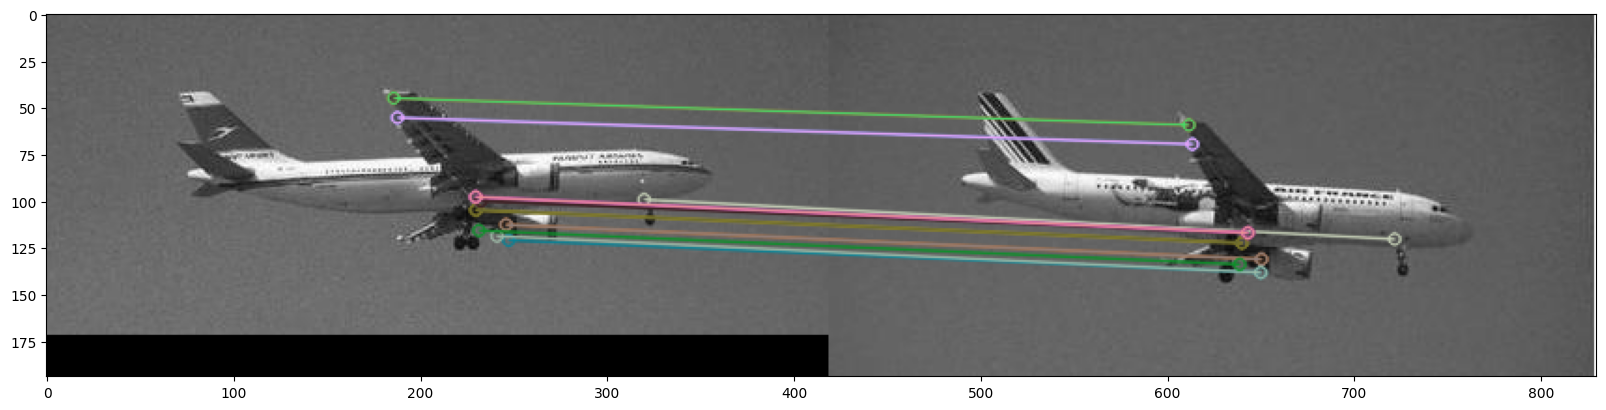

In [532]:
matcher(kps1_2, descs1_2, kps2_2, descs2_2, plane,plane2)

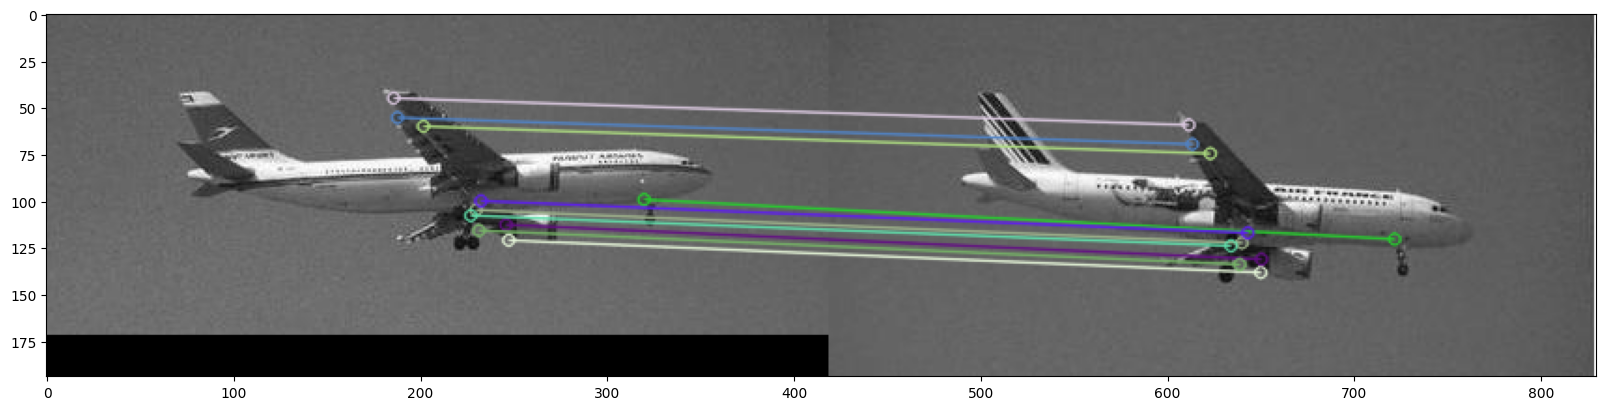

In [533]:
plt.figure(figsize=(20,20))
plt.imshow(brute_force_opencv_matcher(descs1_2,descs2_2, kps1_2, kps2_2, plane, plane2))
plt.show()
